In [1]:
import numpy as np 
import pandas as pd
import tensorflow as tf 
import matplotlib.pyplot as plt 

from tensorflow import keras
from tensorflow.keras import layers 

In [7]:
data_train_path ='Desktop/Fruits_Vegetables/train'
data_test_path ='Desktop/Fruits_Vegetables/test'
data_val_path ='Desktop/Fruits_Vegetables/validation'

In [3]:
img_width=180
img_height=180

In [4]:
data_train=tf.keras.utils.image_dataset_from_directory(
data_train_path,
    shuffle=True,
    image_size=(img_width,img_height),
    batch_size=32,
    validation_split=False)
    


Found 3115 files belonging to 36 classes.


In [10]:
data_category=data_train.class_names
data_category

['apple',
 'banana',
 'beetroot',
 'bell pepper',
 'cabbage',
 'capsicum',
 'carrot',
 'cauliflower',
 'chilli pepper',
 'corn',
 'cucumber',
 'eggplant',
 'garlic',
 'ginger',
 'grapes',
 'jalepeno',
 'kiwi',
 'lemon',
 'lettuce',
 'mango',
 'onion',
 'orange',
 'paprika',
 'pear',
 'peas',
 'pineapple',
 'pomegranate',
 'potato',
 'raddish',
 'soy beans',
 'spinach',
 'sweetcorn',
 'sweetpotato',
 'tomato',
 'turnip',
 'watermelon']

In [8]:
data_val=tf.keras.utils.image_dataset_from_directory(
data_val_path,
    shuffle=False,
    image_size=(img_width,img_height),
    batch_size=32,
    validation_split=False)
    


Found 351 files belonging to 36 classes.


In [9]:
data_test=tf.keras.utils.image_dataset_from_directory(
data_test_path,
    shuffle=False,
    image_size=(img_width,img_height),
    batch_size=32,
    validation_split=False)

Found 359 files belonging to 36 classes.


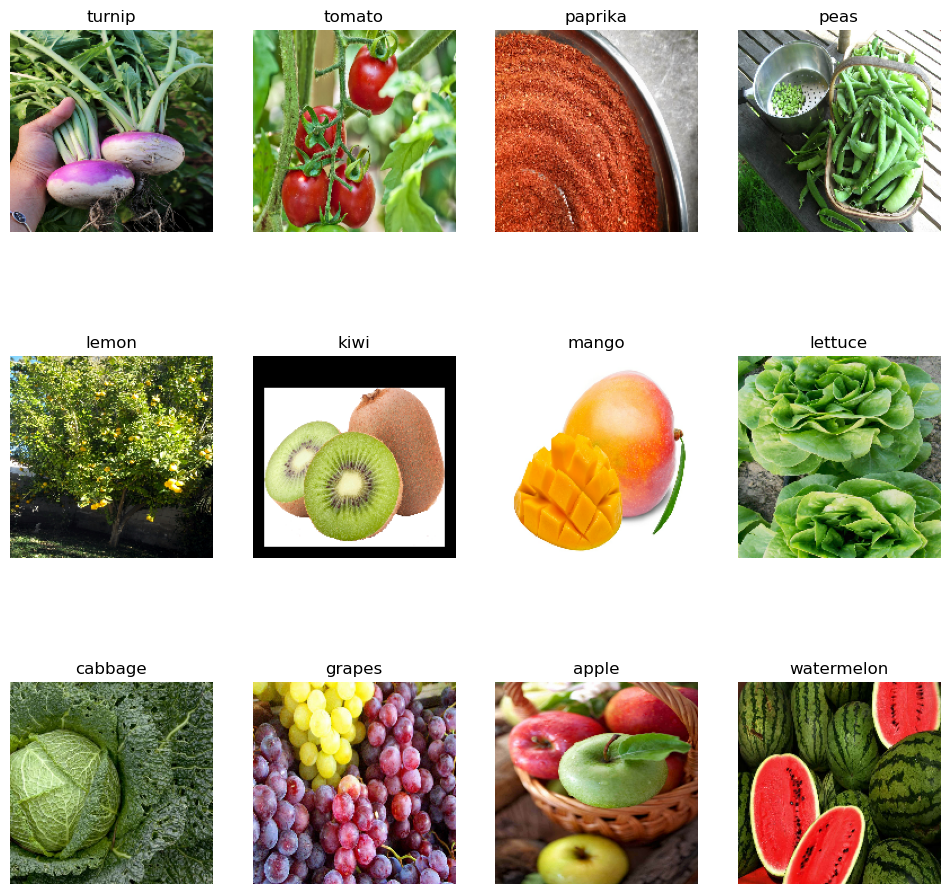

In [31]:
plt.figure(figsize=(12,12))

for image,labels in data_train.take(1): #data_train.take(1): This method selects the first batch from the data_train dataset.
    for i in range(12):
        plt.subplot(3,4,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(data_category[labels[i]])
        plt.axis('off')
        

In [21]:
from tensorflow.keras.models import Sequential

In [22]:
data_train

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [28]:
#model creation 
model = Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128),
    layers.Dense(len(data_category))
    
])

In [29]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [34]:
epochs_size=25
history = model.fit(data_train,validation_data=data_val,epochs=epochs_size,batch_size=32) 

Epoch 1/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 14s 132ms/step - accuracy: 0.0757 - loss: 3.5473 - val_accuracy: 0.3590 - val_loss: 2.2674
Epoch 2/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 11s 117ms/step - accuracy: 0.2925 - loss: 2.4477 - val_accuracy: 0.6239 - val_loss: 1.4411
Epoch 3/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 11s 115ms/step - accuracy: 0.4937 - loss: 1.7955 - val_accuracy: 0.7949 - val_loss: 0.8696
Epoch 4/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 11s 113ms/step - accuracy: 0.6904 - loss: 1.1328 - val_accuracy: 0.8974 - val_loss: 0.4507
Epoch 5/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 12s 118ms/step - accuracy: 0.8263 - loss: 0.6111 - val_accuracy: 0.9345 - val_loss: 0.3377
Epoch 6/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 12s 119ms/step - accuracy: 0.8995 - loss: 0.3629 - val_accuracy: 0.9202 - val_loss: 0.3674
Epoch 7/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 12s 118ms/step - accuracy: 0.9379 - loss: 0.2330 - val_accuracy: 0.9459 - val_loss: 0.3551
Epoch 8/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 12s 120ms/step - accuracy: 0.9608 - loss: 0.1971 - val_accu

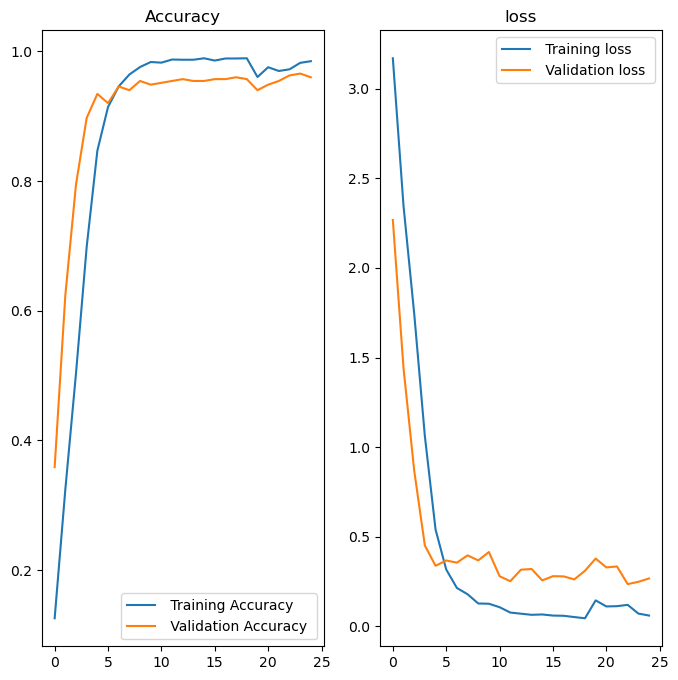

In [37]:
epochs_range=range(epochs_size)
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,history.history['accuracy'],label=" Training Accuracy ")
plt.plot(epochs_range,history.history['val_accuracy'],label=" Validation Accuracy ")
plt.title('Accuracy')
plt.legend()
plt.subplot(1,2,2)
plt.plot(epochs_range,history.history['loss'],label=" Training loss ")
plt.plot(epochs_range,history.history['val_loss'],label=" Validation loss ")
plt.title('loss')
plt.legend()

In [54]:
image='Desktop/carrot.jpg'
image=tf.keras.utils.load_img(image,target_size=(img_height,img_width))
img_arr=tf.keras.utils.array_to_img(image)
img_bat=tf.expand_dims(img_arr,0)

In [55]:
predict= model.predict(img_bat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


In [56]:
score=tf.nn.softmax(predict)

Veg/Fruit in image is <<<<<<<carrot>>>>>>> with accuracy of 65.24


(-0.5, 179.5, 179.5, -0.5)

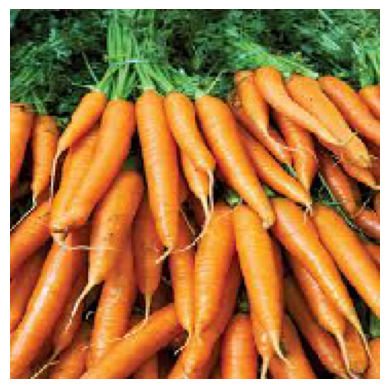

In [57]:
plt.imshow(image)
plt.title(print('Veg/Fruit in image is <<<<<<<{}>>>>>>> with accuracy of {:0.2f}'.format(data_category[np.argmax(score)],np.max(score)*100)))
plt.axis('off')

In [ ]:
model.save('fruits.keras')